In [10]:
#%%

[[Ï∞∏Í≥†1] ÏΩîÎìúÍ≥µÏú† > Îî∞Î¶âÏù¥ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù (Ïã§ÏäµÌååÏùº)](https://dacon.io/competitions/open/235576/codeshare/1276?page=1&dtype=recent)

# 1Ô∏è‚É£  <span style = 'background-color: lightgreen ; color:black'>**library Î∞è data load**</span>

In [7]:
#%%
import pandas as pd #ÌåêÎã§Ïä§ Ìå®ÌÇ§ÏßÄ Î∂àÎü¨Ïò§Í∏∞
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î∂àÎü¨Ïò§Í∏∞

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
train = pd.read_csv('data/train.csv') # Î™®Îç∏ ÌïôÏäµ ÌååÏùº
test = pd.read_csv('data/test.csv') # Î™®Îç∏ ÏãúÌóòÏßÄ ÌååÏùº
submission = pd.read_csv('data/submission.csv') #ÎãµÏïàÏßÄ ÌååÏùº ; Ï†úÏ∂ú ÌååÏùº ÌòïÏãù

# 2Ô∏è‚É£  <span style = 'background-color: lightgreen ; color:black'>**ÌÉêÏÉâÏ†Å ÏûêÎ£åÎ∂ÑÏÑù**</span>
Exploratory Data Analysis (EDA)

### <span style = 'color:orange'> **df.shape** </span>
* dfÏùò Ìñâ, Ïó¥ Í∞úÏàò Ï†ÄÏû•ÎèºÏûàÎäî <span style = 'color:red'>ÏÜçÏÑ±</span>

### <span style = 'color:orange'> **df.info()** </span>
* dfÏùò colÎ≥Ñ Ï†ïÎ≥¥Î•º ÏïåÎ†§Ï£ºÎäî <span style = 'color:red'>Ìï®Ïàò</span>
* ÎπÑÏñ¥ÏûàÏßÄ ÏïäÏùÄ Í∞í (non-null)ÏùÄ Î™á Í∞úÏù∏ÏßÄ?
* colÏùò typeÏùÄ Î¨¥ÏóáÏù∏ÏßÄ?
    * typeÏùò Ï¢ÖÎ•ò: int(Ï†ïÏàò), float(Ïã§Ïàò), object(Î¨∏ÏûêÏó¥), ... (date, ...)

### <span style = 'color:orange'> **df.describe()** </span>
* Ïà´ÏûêÌòï (int, float) colÎì§Ïùò Í∏∞Ïà† ÌÜµÍ≥ÑÎüâÏùÑ Î≥¥Ïó¨Ï£ºÎäî <span style = 'color:red'>Ìï®Ïàò</span>

    * Í∏∞Ïà†ÌÜµÍ≥ÑÎüâÏù¥ÎûÄ? <br>
        Ìï¥Îãπ colÏùÑ ÎåÄÌëúÌï† Ïàò ÏûàÎäî ÌÜµÍ≥ÑÍ∞íÎì§ÏùÑ ÏùòÎØ∏ <br>
        <br>
    * Í∏∞Ïà†ÌÜµÍ≥ÑÎüâ Ï¢ÖÎ•ò <br>
        ```
        * count:     Ìï¥Îãπ columnÏóêÏÑú ÎπÑÏñ¥ÏûàÏßÄ ÏïäÏùÄ Í∞íÏùò Í∞úÏàò
        * mean:      ÌèâÍ∑†
        * std:       ÌëúÏ§ÄÌé∏Ï∞®
        * min:       ÏµúÏÜüÍ∞í (Ïù¥ÏÉÅÏπò Ìè¨Ìï®)
        * 25% (Q1):  Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ÌñàÏùÑ Îïå, ÏïÑÎûòÏóêÏÑú Î∂ÄÌÑ∞ 1/4Î≤àÏß∏ ÏßÄÏ†êÏóê ÏûàÎäî Í∞í
        * 50% (Q2):  Ï§ëÏïôÍ∞í (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ÌñàÏùÑ Îïå, ÏïÑÎûòÏóêÏÑú Î∂ÄÌÑ∞ 2/4Î≤àÏß∏ ÏßÄÏ†êÏóê ÏûàÎäî Í∞í)
        * 75% (Q3):  Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ÌñàÏùÑ Îïå, ÏïÑÎûòÏóêÏÑú Î∂ÄÌÑ∞ 3/4Î≤àÏß∏ ÏßÄÏ†êÏóê ÏûàÎäî Í∞í
        * max:       ÏµúÎåìÍ∞í (Ïù¥ÏÉÅÏπò Ìè¨Ìï®)
        ```
        <br>
    * Ïù¥ÏÉÅÏπò: Ïö∏ÌÉÄÎ¶¨ Î∞ñÏóê ÏûàÎäî Î∂ÄÎ∂ÑÏùÑ Ïù¥ÏÉÅÏπòÎùºÍ≥† Ï†ïÏùò <br>
        ```
        * ÏïÑÎûòÏ™Ω Ïö∏ÌÉÄÎ¶¨: Q_1Q1 -1.5 * IQR1.5 * IQR
        * ÏúÑÏ™Ω Ïö∏ÌÉÄÎ¶¨:   Q_3Q3 + 1.5 * IQR1.5 * IQR
        * IQRIQR =      Q_3 - Q_1Q3 - Q1
        ```

### <span style = 'color:orange'> **df.head(n)** </span>
* dfÏùò ÏúÑÏóêÏÑúÎ∂ÄÌÑ∞ nÍ∞ú ÌñâÏùÑ Î≥¥Ïó¨Ï£ºÎäî <span style = 'color:red'>Ìï®Ïàò</span>
* n default = 5

### <span style = 'color:orange'> **df.tail(n)** </span>
* dfÏùò ÏïÑÎûòÏóêÏÑúÎ∂ÄÌÑ∞ nÍ∞ú ÌñâÏùÑ Î≥¥Ïó¨Ï£ºÎäî <span style = 'color:red'>Ìï®Ïàò</span>
* n default = 5

### <span style = 'color:orange'> **df.groupby()** </span>
* ÏßëÎã®Ïóê ÎåÄÌïú ÌÜµÍ≥ÑÎüâ ÌôïÏù∏

ex) ÏäµÌïú ÎÇ†Ïùò countÏùò ÌèâÍ∑† Ïù¥Îü∞ Í±∏ Î≥º Ïàò ÏûàÏùå. (Ïö∞ÏÑ† ÏäµÌïú Ï†ïÎèÑÎ•º Ïñ¥ÎäêÏ†ïÎèÑ Í∏∞Ï§ÄÏóê Îî∞Îùº <<Ïã¨ÌïòÎã§/ Î≥¥ÌÜµÏù¥Îã§/ Ï†ÑÌòÄ ÏäµÌïòÏßÄ ÏïäÎã§>> Ï†ïÎèÑÎ°ú Ï†ÑÏ≤òÎ¶¨ Ìï¥ÏïºÌï®.)

## <span style = 'color:green'> **visualization** </span>

In [1]:
import matplotlib.pyplot as plt

<Figure size 864x216 with 0 Axes>

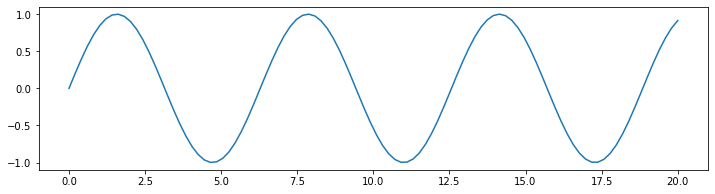

In [17]:
#%%
import numpy as np

x = np.linspace(0, 20, 100)
plt.figure(figsize = (12,3))
plt.plot(x, np.sin(x))

plt.show()


# <span style = 'background-color: lightgreen ; color:black'>**ÏãúÍ∞ÅÌôî**</span>

[Í∑∏Î¶ºÌåê ÌÅ¨Í∏∞ ÏÑ§Ï†ï Ï∞∏Í≥†](https://www.delftstack.com/ko/howto/matplotlib/how-to-change-the-figure-size-in-matplotlib/) <br>
[plt Ï∞∏Í≥† 2](https://cool24151.tistory.com/16)

## <span> 1. MatplotlibÏù¥ÎûÄ? </span>


#### (1) Matplotlib Í∏∞Îä•
ÌååÏù¥Ïç¨ÏóêÏÑú Í∏∞Î≥∏Ï†ÅÏù∏ ÏãúÍ∞ÅÌôî Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌï¥Ï§å. <br>
pyplot Í∞ùÏ≤¥Î•º ÏÇ¨Ïö©Ìï¥ÏÑú Îç∞Ïù¥ÌÑ∞Î•º ÏãúÍ∞ÅÌôîÌïòÏó¨ ÌëúÏãúÌï¥Ï£ºÎäîÎç∞, <br>
<br>

Ïù¥ Îïå Îç∞Ïù¥ÌÑ∞Îäî ***numpy***ÎÇò ***list*** ÌòïÌÉú ÎòêÎäî ***pandasÏùò series Í∞ùÏ≤¥***Î•º ÏÇ¨Ïö©Ìï¥Ï£ºÎ©¥ Îê®. <br>
pyplot Í∞ùÏ≤¥Ïóê Í∑∏ÎûòÌîÑÎì§Ïù¥ ÌïòÎÇòÌïòÎÇò ÏåìÏù∏ ÌõÑÏóê plt.show()Î•º Ìï¥Ï£ºÎ©¥ <u>ÏåìÏïÑÏò® Í∑∏ÎûòÌîÑÎì§Ïù¥ Î™®Îëê Ï∂úÎ†•</u>Îê®. <br>


#### (2) Ïû•Ï†ê
pyplotÏù¥ÎùºÍ≥† Î∂àÎ¶¨Îäî Í∞ùÏ≤¥ ÏïàÏóê ÏûàÎäî figure(=Î™®Ìåê)Ïóê Í∑∏Î¶ºÏùÑ Í∑∏Î¶¨Í≤å Îê®. <br>
Îî∞ÎùºÏÑú ***plot***Ïù¥ÎùºÍ≥† Î™ÖÎ†πÏñ¥Î•º Í≥ÑÏÜç ÏπòÍ≤å ÎêòÎ©¥ Ìï¥Îãπ Í∑∏Î¶ºÌåêÏóê Í∑∏Î¶ºÏùÑ Í≥ÑÏÜç Í∑∏Î¶¨Í≥† ÏûàÎã§Í∞Ä <br>
***show***ÎùºÎäî Î™ÖÎ†πÏñ¥Î•º ÏπòÍ≤å ÎêòÎ©¥<br>
ÏßÄÍ∏àÍπåÏßÄ Í∑∏Î¶ºÏùÑ Í∑∏Î†∏Îçò Í∑∏Î¶ºÌåêÏùò Í∑∏Î¶ºÎì§ÏùÑ Î™®Îëê Î≥¥Ïó¨Ï§å. <br>

#### (3) Îã®Ï†ê
matplotlib Î™®ÎìàÏùò ÏµúÎåÄ Îã®Ï†êÏùÄ argumentsÎì§ÏùÑ kwargsÎ°ú Î∞õÎäî Í≤É. <br>
<br>
Ï¶â, ***Í≥†Ï†ïÎêú argumentÍ∞Ä ÏóÜÍ∏∞Ïóê*** <br>
Shift + TabÏùÑ ÎàåÎü¨ÎèÑ Ïñ¥ÎñªÍ≤å ÏÇ¨Ïö©Ìï¥ÏïºÌïòÎäîÏßÄÏóê ÎåÄÌïú ÎèÑÏõÄÏùÑ Î∞õÍ∏∞ ÌûòÎì§Îã§. <br>
ÏùºÎ∞òÏ†ÅÏúºÎ°ú matplotlib ÏÇ¨Ïù¥Ìä∏Ïóê Îì§Ïñ¥Í∞ÄÏÑú Îß§Îâ¥ÏñºÏùÑ ÌÜµÌï¥ ÌôïÏù∏ÌïòÍ≥† ÏÇ¨Ïö©ÌïúÎã§.

[kwargs](https://brunch.co.kr/@princox/180) : keyword arguments, ÌÇ§ÏõåÎìúÎ•º Ï†úÍ≥µÌï®.

## <span style = 'color:green'> **2. ÏãúÍ∞ÅÌôî Î≥¥Ï°∞ Í∏∞Îä•** </span>

### <span style = 'color:lightgreen'> **(1) Ïó¨Îü¨Í∞úÏùò Í∑∏Î¶ºÌåê ÎßåÎì§Í∏∞** </span>

#### **Í∑∏Î¶ºÌåê ÌÅ¨Í∏∞** ÏÑ§Ï†ï

In [ ]:
_ = plt.figure(figsize = (12,3))

<Figure size 864x216 with 0 Axes>

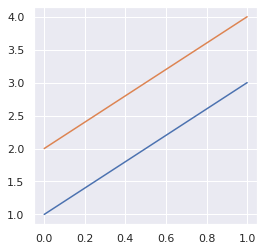

In [ ]:
_ = plt.rcParams['figure.figsize'] = (4,4) # plt.rcParamsÎäî plt.plot Ïïû Îí§Ïóê Î∞∞ÏπòÎê† Ïàò ÏûàÎã§.
                                           # ÎèôÏùºÌïú Ïä§ÌÅ¨Î¶ΩÌä∏ÏóêÏÑú ÏûëÏÑ±Îêú Í∑∏Î¶ºÏùÄ Ìï†ÎãπÎêú Í≤ÉÍ≥º ÎèôÏùºÌïú Í∑∏Î¶ºÌÅ¨Í∏∞Î•º Í≥µÏú†ÌïúÎã§.
                                           # ÎèôÏùºÌïú Ïä§ÌÅ¨Î¶ΩÌä∏ÏóêÏÑú figure.figsizeÎ•º Ïó¨Îü¨ Î≤à Ìï†ÎãπÌï† Ïàò ÏûàÏßÄÎßå
                                           # ÏÉùÏÑ±Îêú Í∑∏Î¶ºÏóêÎäî Ï≤´ Î≤àÏß∏ ÏÑ§Ï†ïÎßå Ï†ÅÏö©ÎêúÎã§.
_ = plt.plot([[1,2],[3,4]])
_ = plt.show()
# import numpy as np
# # fig, ax = plt.subplots()
# ax.plot(range(100), [np.sin(value) for value in range(100)])
# ax.show()

#### <span style = 'color:orange'> **plt.figure()** </span>
: figureÎ•º Î∞òÌôòÌïòÎäî Ìï®Ïàò

In [ ]:
fig = plt.figure()

<Figure size 288x288 with 0 Axes>

#### <span style = 'color:orange'> **fig.set_size_inches()** </span>
: figureÏùò ÌÅ¨Í∏∞Î•º Ï°∞Ï†ïÌïòÎäî Ìï®Ïàò
* Í∑∏Î¶ºÏùÑ ÏÉùÏÑ±Ìïú ÌõÑ matplotlibÏóêÏÑú Í∑∏Î¶º ÌÅ¨Í∏∞Î•º Î≥ÄÍ≤ΩÌïòÎ†§Í≥† Ìï† Îïå Ï£ºÎ°ú ÏÇ¨Ïö© <br>
(figureÎ•º Ïù¥ÎØ∏ ÏÉùÏÑ±Ìïú Í≤ΩÏö∞Ïùò Î∞©Î≤ï) <br>

set_size_inchesÏóêÎäî ÎîîÌè¥Ìä∏Í∞íÏù¥ TrueÏù∏ forward ÏòµÏÖòÏù¥ ÏûàÍ≥†, <br>
Ïù¥Îäî ÏÉà ÌÅ¨Í∏∞Í∞Ä Ï£ºÏñ¥ÏßÑ ÌõÑ Ï∫îÎ≤ÑÏä§ ÌÅ¨Í∏∞Í∞Ä ***ÏûêÎèôÏúºÎ°ú ÏóÖÎç∞Ïù¥Ìä∏*** Îê®ÏùÑ ÏùòÎØ∏ÌïúÎã§.


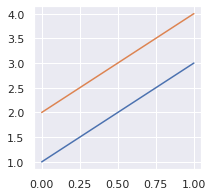

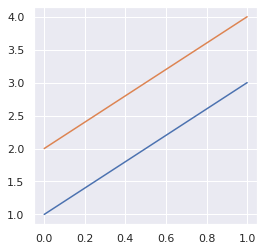

In [ ]:
fig1 = plt.figure(1)
_ = plt.plot([[1,2],[3,4]])
fig2 = plt.figure(2)
_ = plt.plot([[1,2],[3,4]])

fig1.set_size_inches(3,3)
fig2.set_size_inches(4,4)

_ = plt.show()

# fig1, fig2Îäî ÏÉùÏÑ±Îêú Îëê Í∑∏Î¶ºÏóê ÎåÄÌïú Ï∞∏Ï°∞


#### <span style = 'color:orange'> **fig.add_subplot()** </span>
: ÌïòÏúÑ Í∑∏Î¶ºÌåêÏùÑ ÏÉùÏÑ±Ìï¥Ï£ºÎäî Ìï®Ïàò

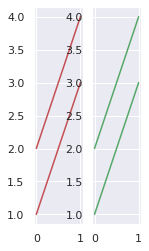

In [ ]:
fig = plt.figure()
ax_1 = fig.add_subplot(1,2,1) # Í∞ÄÎ°ú, ÏÑ∏Î°ú, nÎ≤àÏß∏ Ïó¥; nÏùÄ 1Ïù¥ÏÉÅ
ax_2 = fig.add_subplot(1,2,2)

_ = ax_1.plot([[1,2],[3,4]], c = 'r') # cÎäî color ÏòµÏÖò
_ = ax_2.plot([[2,1],[4,3]], c = 'g')

_ = plt.show()

### <span style = 'color:lightgreen'> **(2) ÏÉâ ÏÑ§Ï†ï** </span>
**color** ÎòêÎäî **c** Ïù∏ÏûêÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏßÅÏ†ë ÏÉâÏùÑ ÏßÄÏ†ï.

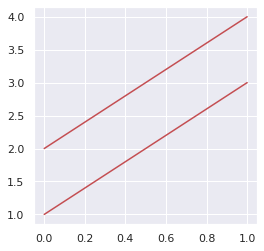

In [ ]:
_ = plt.plot([[1,2], [3,4]], color='r')

### <span style = 'color:lightgreen'> **(3) ÏÑ† Ïä§ÌÉÄÏùº ÏÑ§Ï†ï** </span>
**linestyle** ÌòπÏùÄ **ls** Ïù∏ÏûêÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏßÅÏ†ë ÎùºÏù∏Ïä§ÌÉÄÏùºÏùÑ ÏßÄÏ†ïÌïúÎã§.


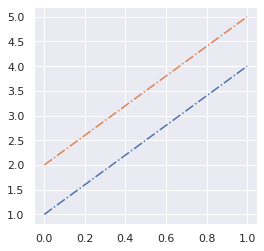

In [ ]:
_ = plt.plot([[1,2],[4,5]], ls = '-.')

### <span style = 'color:lightgreen'> **(4) Ï†úÎ™©, Î≤îÎ°Ä ÏÑ§Ï†ï** </span>

#### <span style = 'color:orange'> **plt.title('title of plot')** </span>
: plotÏùò Ï†úÎ™©ÏùÑ ÎßåÎì§Ïñ¥ Ï§å.
<br>

#### <span style = 'color:orange'> **plt.legend(...)** </span>
: plotÏùò Î≤îÎ°ÄÎ•º ÎßåÎì§Ïñ¥Ï§å <br>
<br>
[Î≤îÎ°Ä ÏûêÏÑ∏Ìûà Î≥¥Í∏∞](https://codetorial.net/matplotlib/set_legend.html)

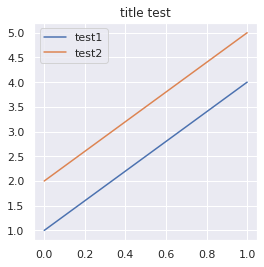

In [ ]:
_ = plt.plot([1,4], label = 'test1')
_ = plt.plot([2,5], label = 'test2')
_ = plt.title('title test')
_ = plt.legend()

## <span style = 'color:green'> **3. Îã§ÏñëÌïú ÏãúÍ∞ÅÌôî plot** </span>

### <span style = 'color:orange'> **plt.bar(x,y, color = 'r', width = 0.25, ...)** </span>
* Î∞òÎ≥µ
* stack

##### * Î∞òÎ≥µ

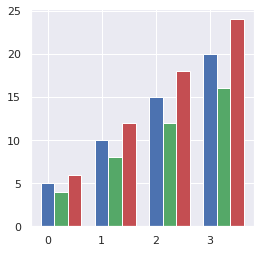

In [ ]:
data = [[5,10,15,20], [4,8,12,16], [6,12,18,24]]
x = np.arange(4)

_ = plt.bar(x+0,data[0],color = 'b', width = 0.25) # xÏóê Í∞ÑÍ≤©Ï£ºÍ∏∞
_ = plt.bar(x+0.25,data[1],color = 'g', width = 0.25)
_ = plt.bar(x+0.5,data[2],color = 'r', width = 0.25)

##### * Ïä§ÌÉù

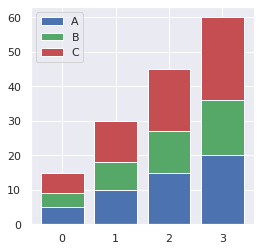

In [ ]:
data = np.array([[5,10,15,20], [4,8,12,16], [6,12,18,24]])
col_list = ['b','g','r']
lab_list = ['A', "B", 'C']

x = np.arange(data.shape[1])
for i in range(data.shape[0]):
    _ = plt.bar(x, data[i], bottom = np.sum(data[:i], axis = 0),
    color = col_list[i], label = lab_list[i])
_ = plt.legend()
_ = plt.show()

### <span style = 'color:orange'> **plt.hist(x, bins = 100)** </span>

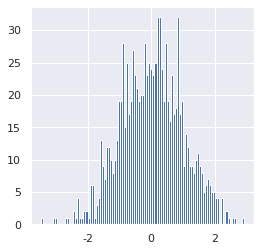

In [ ]:
x = np.random.normal(0,1,1000)
_ = plt.hist(x,bins = 100)

### <span style = 'color:orange'> **plt.boxplot(data)** </span>

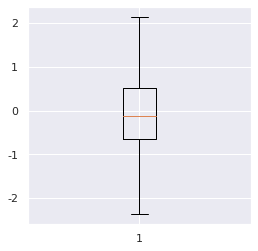

In [ ]:
x = np.random.normal(0,1,100) # 0~1ÏÇ¨Ïù¥Î•º Ï†ïÍ∑úÎûúÎç§ÏúºÎ°ú 100Í∞ú ÎΩëÍ∏∞
_ = plt.boxplot(x)

### <span style = 'color:orange'> **plt.scatter(x, y, marker = ÎßàÏª§, s = ÏÇ¨Ïù¥Ï¶à, alpha = 0.5, ...)** </span>
* ÏÇ∞Ìè¨ÎèÑ <br>
Í≤πÏπòÎäî Î∂ÄÎ∂Ñ ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Ìà¨Î™ÖÎèÑÎ•º 0.5 Ï†ïÎèÑÎ°ú Ìï¥Ï§ÄÎã§.

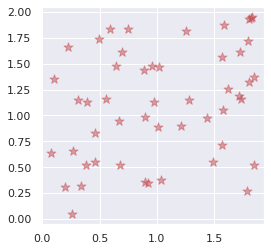

In [ ]:
x = np.random.uniform(0,2,50)
y = np.random.uniform(0,2,50)
_ = plt.scatter(x, y, marker = '*', s = 90, alpha = 0.5, color = 'r')

### <span style = 'color:orange'> **matplotlib with pandas** </span>
dataframeÏù¥ÎÇò series Î≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Í∑∏Î¶¥ Ïàò ÏûàÎèÑÎ°ù ÏßÄÏõêÌï¥Ï§ÄÎã§.

* Í∞Å Î≥ÄÏàò Î≥ÑÎ°ú ÏÑ†ÌÉùÌï¥ ÏãúÍ∞ÅÌôî

In [ ]:
iris = pd.read_csv('iris.csv')
fig = plt.figure()
sub = []
for i in range(1,5) : 
    sub.append(fig.add_subplot(2,2,i))
sub[0].scatter(iris['SepalLength'],iris['SepalWidth'])
sub[1].scatter(iris['SepalLength'],iris['PetalLength'])
sub[2].scatter(iris['SepalWidth'],iris['PetalWidth'])
sub[3].scatter(iris['SepalWidth'],iris['PetalLength'])

* Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî Ìïú Î≤àÏóê

#### <span style = 'color:yellow'> **df.plot()** </span>
Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò plotÏùÑ Í∑∏Î†§Ï£ºÎäî Ìï®Ïàò. <br>

In [ ]:
iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']].plot()

#### <span style = 'color:yellow'> **pd.plotting.scatter_matrix(data, diagonal = 'kde' or 'hist', alpha = , figsize = )** </span>
Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò ÏÇ∞Ìè¨ÎèÑÎ•º Í∑∏Î†§Ï§å. <br>
diagonal Ïù∏ÏûêÎ°ú ÎåÄÍ∞ÅÏÑ†Ïùò Í∞Å Î≥ÄÏàòÎ•º histogram ÌòπÏùÄ density Ï§ë Ïñ¥Îñ§ ÌòïÌÉúÎ°ú Í∑∏Î¶¥ Í≤ÉÏù∏ÏßÄÎ•º ÏßÄÏ†ïÌï¥Ï§Ñ Ïàò ÏûàÏùå.

In [ ]:
pd.plotting.scatter_matrix(iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']], 
                           diagonal='kde', alpha=1, figsize=(20,20))

Ïù¥ Î∏îÎ°úÍ∑∏Ïùò ÏûëÏÑ±ÏûêÍ∞Ä Ï∞∏Í≥†Ìïú ÏòÅÏÉÅ<br>
‚ÄãEdwith - Î®∏Ïã†Îü¨ÎãùÏùÑ ÏúÑÌïú ÌååÏù¥Ïç¨ (Data Handling - Visualization - matplotlib) [ÎπÑÎîîÏò§ ÌååÏùº]

### <span style = 'color:orange'> **plt.title(label, fontsize)** </span>
* Í∑∏ÎûòÌîÑ Ï†úÎ™© ÏÉùÏÑ±

### <span style = 'color:orange'> **plt.xlabel(label, fontsize)** </span>
* xÏ∂ï Ïù¥Î¶Ñ ÏÑ§Ï†ï

### <span style = 'color:orange'> **plt.ylabel(label, fontsize)** </span>
* yÏ∂ï Ïù¥Î¶Ñ ÏÑ§Ï†ï

### <span style = 'color:orange'> **plt.axvline(x, color)** </span>
* Ï∂ïÏùÑ Í∞ÄÎ°úÏßÄÎ•¥Îäî <span style = 'color:red'>ÏÑ∏Î°ú ÏÑ†</span> ÏÉùÏÑ±

### <span style = 'color:orange'> **plt.text(x, y, s, fontsize)** </span>
* ÏõêÌïòÎäî ÏúÑÏπòÏóê ÌÖçÏä§Ìä∏ ÏÉùÏÑ±

### <span style = 'color:orange'> **plt.plotÏùò Ïä§ÌÉÄÏùº** </span>
- ÏÉâÍπî
```
Î¨∏ÏûêÏó¥      ÏïΩÏûê
blue        b
green       g
red         r
cyan        c
magenta     m
yellow      y
black       k
white       w
```
<br>

- ÎßàÏª§
```
ÎßàÏª§        ÏùòÎØ∏
.           Ï†ê
o           Ïõê (ÏïåÌååÎ≤≥)
v           Ïó≠ÏÇºÍ∞ÅÌòï (ÏïåÌååÎ≤≥)
^           ÏÇºÍ∞ÅÌòï
s           ÏÇ¨Í∞ÅÌòï
*           Î≥Ñ
x           ÏóëÏä§
d           Îã§Ïù¥ÏïÑÎ™¨Îìú
```
<br>

- ÏÑ†
```
Î¨∏ÏûêÏó¥      ÏùòÎØ∏
-	    Ïã§ÏÑ†
--	    ÎÅäÏñ¥ÏßÑ Ïã§ÏÑ†
-.	    Ï†ê+Ïã§ÏÑ†
:	    Ï†êÏÑ†
```
<br>

## <span style = 'color:green'> **correlation** </span>
### <span style = 'color:orange'> **df.corr()** </span>
* correlation coefficientÏùò Ï§ÑÏûÑÎßê <br>
<br>

* ÏÉÅÍ¥ÄÍ≥ÑÏàò: Îëê Í∞úÏùò Î≥ÄÏàòÍ∞Ä Í∞ôÏù¥ ÏùºÏñ¥ÎÇòÎäî Í∞ïÎèÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏàòÏπò.
* -1 ~ 1 ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ ÏßÄÎãò.
* -1Ïù¥ÎÇò 1Ïù∏ ÏàòÏπòÎäî ÌòÑÏã§ ÏÑ∏Í≥ÑÏóêÏÑú Í¥ÄÏ∏°ÎêòÍ∏∞ ÌûòÎì† ÏàòÏπò.
* Î∂ÑÏïºÎ≥ÑÎ°ú Í∏∞Ï§ÄÏùÑ Ï†ïÌïòÎäî Í≤ÉÏóê Îî∞Îùº Îã¨ÎùºÏßÄÍ≤†ÏßÄÎßå, <u>Î≥¥ÌÜµ <span style = 'color = red; font-size = 140%'>0.4 Ïù¥ÏÉÅ</span>Ïù¥Î©¥ Îëê Í∞úÏùò Î≥ÄÏàò Í∞ÑÏóê ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÏûàÎã§</u>Í≥† ÏñòÍ∏∞Ìï®.
<br>
<br>

* üí•üí•üí•ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎäî Ïù∏Í≥ºÍ¥ÄÍ≥ÑÏôÄ Îã§Î¶Ñ <br>
    ex) <br>    
    * ÏÑ†Í∏ÄÎùºÏä§ ÌåêÎß§ÎüâÏù¥ Ï¶ùÍ∞Ä***Ìï®Ïóê Îî∞Îùº***, ÏïÑÏù¥Ïä§ÌÅ¨Î¶º ÌåêÎß§Ïï°ÎèÑ ***Í∞ôÏù¥ Ï¶ùÍ∞Ä***ÌïòÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏùå.
    * ÌïòÏßÄÎßå ÏÑ†Í∏ÄÎùºÏä§ ÌåêÎß§ÎüâÏù¥ Ï¶ùÍ∞ÄÌñàÍ∏∞ ***ÎïåÎ¨∏Ïóê*** ÏïÑÏù¥Ïä§ÌÅ¨Î¶º ÌåêÎß§Ïï°Ïù¥ Ï¶ùÍ∞ÄÌñàÎã§ÎùºÍ≥† Ìï¥ÏÑùÌïòÎäî Í≤ÉÏùÄ ÌÉÄÎãπÌïòÏßÄ ÏïäÏùå.
    * ÏÑ†Í∏ÄÎùºÏä§ ÌåêÎß§ÎüâÏù¥ Ï¶ùÍ∞ÄÌñàÎã§Îäî Í≤ÉÏùÄ Ïó¨Î¶Ñ ***ÎïåÎ¨∏***Ïù¥ÎùºÍ≥† Î≥º Ïàò ÏûàÏúºÎØÄÎ°ú, ÎÇ†Ïî®Í∞Ä ÎçîÏõåÏßê***Ïóê Îî∞Îùº*** ÏÑ†Í∏ÄÎùºÏä§ ÌåêÎß§ÎüâÍ≥º ÏïÑÏù¥Ïä§ÌÅ¨Î¶º ÌåêÎß§Ïï°Ïù¥ Í∞ôÏù¥ Ï¶ùÍ∞ÄÌñàÎã§Í≥† Î≥¥Îäî Í≤ÉÏù¥ ÌÉÄÎãπÌï† Í≤ÉÏûÑ.
    <br>
    
    üí• ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ; ~ Ìï®Ïóê Îî∞Îùº (Î∞òÎπÑÎ°Ä, ÎπÑÎ°Ä, ...) <br>
    üí• Ïù∏Í≥ºÍ¥ÄÍ≥Ñ ; ~ ÎïåÎ¨∏Ïóê (ÏïºÍ∏∞, Ï¥àÎûò, ...)


#### seaborn

In [29]:
import seaborn as sns

* [sns plot Ï¢ÖÎ•ò]
    - Relational Plot (Ïó∞ÏÜç Îç∞Ïù¥ÌÑ∞ Í¥ÄÎ†®ÏÑ±)
        - replot
        - scatter
        - lineplot <br>
        <br>
    - Categorical Plot (Ïπ¥ÌÖåÍ≥†Î¶¨ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôî)
        - catplot
        - stripplot
        - swarmplot
        - boxplot
        - violinplot
        - pointplot
        - barplot
        - countplot <br>
        <br>
    - Distribution Plot (Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨)
        - distplot
        - kdeplot
        - rugplot <br>
        <br>
    - Regression Plot (Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌöåÍ∑ÄÏÑ†)
        - lmplot
        - regplot
        - residplot <br>
        <br>
    - Matrix Plot (Ïó¨Îü¨Í∞ÄÏßÄ Î≥ÄÏàò ÎπÑÍµê)
        - heatmap
        - clustermap <br>
        <br>
    - Multi-plot grid (Ïó¨Îü¨ Í∞úÏùò Í∑∏ÎûòÌîÑ)
        - Facetgrid
        - Pairgrid
        - Jointgrid <br>
        <br>
```
Îç∞Ïù¥ÌÑ∞Ïùò Ï¢ÖÎ•òÍ∞Ä Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞Ïù∏ÏßÄ, Ïπ¥ÌÖåÍ≥†Î¶¨ Îç∞Ïù¥ÌÑ∞Ïù∏ÏßÄ, ÎÇ¥Í∞Ä Í∂ÅÍ∏àÌïú ÎÇ¥Ïö©Ïù¥ Îç∞Ïù¥ÌÑ∞Ïùò ÏãúÍ≥ÑÏó¥Ï†Å Î≥ÄÌôîÏù∏ÏßÄ Î∂ÑÌè¨Ïù∏ÏßÄÏóê Îî∞Îùº Ï†ÅÌï©Ìïú Í∑∏ÎûòÌîÑÎ•º ÏÑ†ÌÉùÌï¥ÏÑú ÎèÑÏãùÌôîÌïòÎäî Î∞©Î≤ïÏùÑ ÏùµÌûåÎã§Î©¥ Ï∂©Î∂ÑÌï©ÎãàÎã§.
```
<br>

[seaborn ÏãúÍ∞ÅÌôî Ï∞∏Í≥†ÏûêÎ£å](https://wikidocs.net/86290)

# 3Ô∏è‚É£  <span style = 'background-color: lightgreen ; color:black'>**Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨**</span>
Data Cleansing & Pre-Processing

### <span style = 'color:orange'> **srs.isna()** </span>
* Í≤∞Ï∏°Ïπò Ïó¨Î∂ÄÎ•º ÌôïÏù∏Ìï¥Ï§å.
* Í≤∞Ï∏°ÏπòÎ©¥ True, ÏïÑÎãàÎ©¥ False

### <span style = 'color:orange'> **df.fillna()** </span>
* Í≤∞Ï∏°ÏπòÎ•º <u>Ï±ÑÏö∞Í≥†Ïûê ÌïòÎäî column</u>Í≥º <br>
    Í≤∞Ï∏°ÏπòÎ•º <u>ÎåÄÏã†ÌïòÏó¨ ÎÑ£Í≥†Ïûê ÌïòÎäî Í∞í</u>ÏùÑ Î™ÖÏãúÌï¥ Ï§òÏïº Ìï®.

# 4Ô∏è‚É£  <span style = 'background-color: lightgreen ; color:black'>**Î≥ÄÏàò ÏÑ†ÌÉù Î∞è Î™®Îç∏ Íµ¨Ï∂ï**</span>
Feature Engineering & Initial Modeling <br>

### <span style = 'color:orange'> **sklearn.ensemble.RandomForestRegressor()** </span>
* ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Ìòï


# 5Ô∏è‚É£  <span style = 'background-color: lightgreen ; color:black'>**Î™®Îç∏ ÌïôÏäµ Î∞è Í≤ÄÏ¶ù**</span>
Model Tuning & Evaluation

### <span style = 'color:orange'> **model.fit()** </span>
* Î™®Îç∏ ÌïôÏäµ

### <span style = 'color:orange'> **model.predict()** </span>
* Î™®Îç∏ ÏòàÏ∏°

### <span style = 'color:orange'> **df.to_csv()** </span>
* csv ÌååÏùº Ï†ÄÏû•ÌïòÎäî Ìï®Ïàò

# 6Ô∏è‚É£  <span style = 'background-color: lightgreen ; color:black'>**Í≤∞Í≥º Î∞è Í≤∞Ïñ∏**</span>
Conclusion & Discussion